In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


## Data Cleaning

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(246, 14)

In [5]:
df.columns = df.columns.str.replace(' ','')

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [9]:
df['Classes'].unique() # spaces in the values

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [10]:
df['Classes'] = df['Classes'].str.strip()

In [11]:
df['Classes'].unique()

array(['not fire', 'fire', nan, 'Classes'], dtype=object)

<AxesSubplot:>

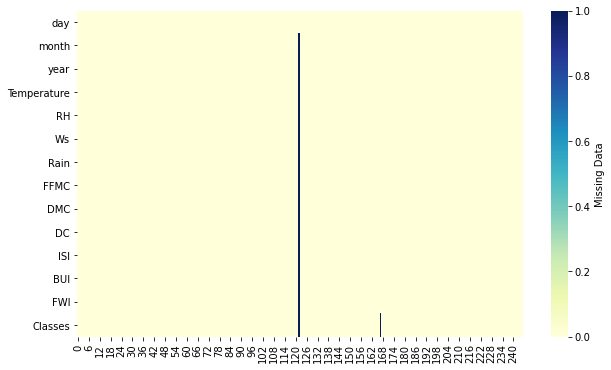

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [13]:
# one row between 120 and 126 has null value in all entries 
# finding null value row
df[df['Rain'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# reconfirming
df[df['RH'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.drop(df[df['RH'].isnull()].index, inplace=True)

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [16]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [17]:
df[df['day']== 'day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [18]:
df.drop(df[df['day']== 'day'].index, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [20]:
# all the column entries except class have the interger datatype
# changing the datatypes

df = pd.to_numeric(df)

#df = df.astype({"Date": int, 'month': int, 'year': int, 'Temperature': int,'RH': int,'Ws': int,'Rain': int,'FFMC': int,'DMC': int,'DC': int,'ISI': int,'BUI': int,'FWI': int,}, errors='raise')

TypeError: arg must be a list, tuple, 1-d array, or Series

In [21]:
df[list(df.columns)[:-1]] = df[list(df.columns)[:-1]].apply(pd.to_numeric)

ValueError: Unable to parse string "14.6 9" at position 165

In [22]:
df[df['DC']=="14.6 9"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [23]:
# we can remove 9 or 6 or keep it as 14.69
# lets go with 3rd option
df['DC'] = df['DC'].str.replace(' ', '')

In [24]:
df['month'].unique()

unique_dict = {}

for column in list(df.columns)[:-1]:
    uni_list = list(df[column].unique())
    unique_dict[column] = uni_list
    print(f'{column}:{uni_list} \n')

day:['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'] 

month:['06', '07', '08', '09'] 

year:['2012'] 

Temperature:['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35', '36', '37', '22', '24', '38', '39', '40', '42'] 

RH:['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65', '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50', '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51', '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87', '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35', '39', '31', '21', '40', '24', '38', '26'] 

Ws:['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17', '26', '11', '10', '9', '8', '6', '29'] 

Rain:['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7', '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2', '10.1', '3

In [25]:
df['FWI'] = df['FWI'].replace('fire   ', np.nan)

In [26]:
df[list(df.columns)[:-1]] = df[list(df.columns)[:-1]].apply(pd.to_numeric)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 28.6+ KB


## Handling Missing Values

### 1. Drop missing value

In [28]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
dtype: int64

In [35]:
df[df['FWI'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,NaN


In [30]:
df.shape

(244, 14)

In [36]:
df1 = df.copy()

In [37]:
# colums with missing values
cols = [var for var in df1.columns if df1[var].isnull().sum()>0]
cols

['FWI', 'Classes']

In [38]:
df2= df1[['FWI', 'Classes']].dropna()

In [40]:
df2.shape

(243, 2)

In [41]:
df2.tail()

,FWI,Classes
241,6.5,fire
242,0.0,not fire
243,0.2,not fire
244,0.7,not fire
245,0.5,not fire


array([[<AxesSubplot:title={'center':'FWI'}>]], dtype=object)

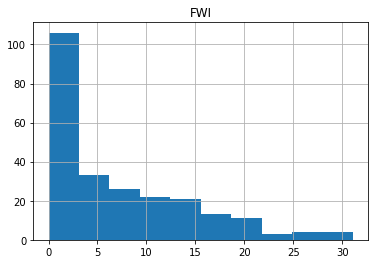

In [42]:
df2.hist()

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

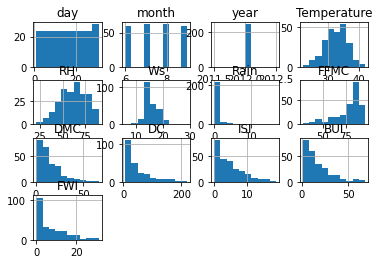

In [43]:
df1.hist()

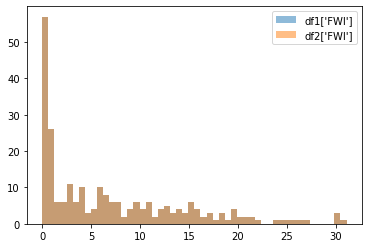

In [46]:
plt.hist(df1['FWI'], bins=50, alpha=0.5, label="df1['FWI']")
plt.hist(df2['FWI'], bins=50, alpha=0.5, label="df2['FWI']")
plt.legend(loc='upper right')
plt.show()

In [47]:
temp = pd.concat([
    # % of observations per category, original data 
    df1['Classes'].value_counts()/len(df1),
    # % of observations per category, cca data 
    df1['Classes'].value_counts()/len(df2)
],axis=1)

temp.columns=['original','cca']
temp

,original,cca
fire,0.561475,0.563786
not fire,0.434426,0.436214


C:\Users\Praveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

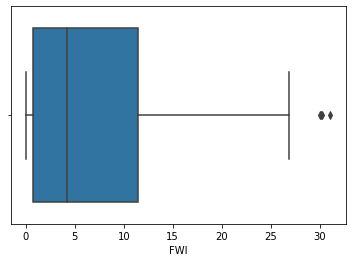

In [86]:
sns.boxplot(df_1['FWI'])

<AxesSubplot:>

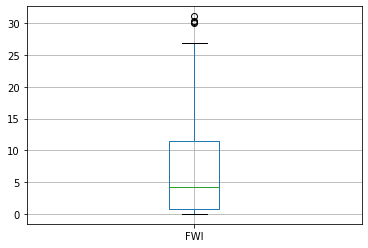

In [87]:
df_1.boxplot(['FWI'])

### 2.  Filling na with mean, median or mode

In [52]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [53]:
df['Classes'].mode()

0    fire
dtype: object

In [54]:
df_1 = df.copy()

In [68]:
df_1['Classes_mode'] = df_1['Classes'].fillna(df['Classes'].mode()[0])

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Classes_mode
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,not fire


In [78]:
## Numernical variable
df_1['FWI'].isnull().sum()

1

In [79]:
# fillna(mean) and fillna(median)
df_1['FWI'].mean()

7.03539094650206

In [82]:
df_1['FWI'].median()

4.2

In [88]:
df_1['FWI_mean'] = df_1['FWI'].fillna(df['FWI'].mean())
df_1['FWI_median'] = df_1['FWI'].fillna(df['FWI'].median())

In [89]:
df_1['FWI_median'].isnull().sum()

0

In [92]:
print('Original_variance: ',df_1['FWI'].var())
print('MeanImp_variance: ',df_1['FWI_mean'].var())
print('MedianImp_variance: ',df_1['FWI_median'].var())

Original_variance:  55.36204809033089
MeanImp_variance:  55.13422073193446
MedianImp_variance:  55.167169263981656


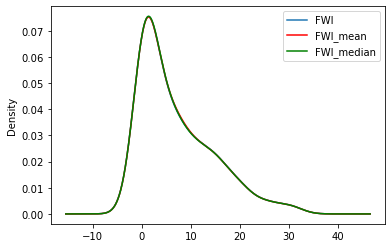

In [93]:
fig, ax = plt.subplots()
df_1['FWI'].plot(kind='kde', ax= ax)
df_1['FWI_mean'].plot(kind='kde', ax= ax,color='red')
df_1['FWI_median'].plot(kind='kde', ax= ax,color='green')
ax.legend()

plt.show()

In [94]:
df_1.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,FWI_mean,FWI_median
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350781,0.350752,0.350960
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.082639,0.082604,0.083285
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.566670,0.564599,0.562344
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.580957,-0.577577,-0.574773
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032368,0.032315,0.030910
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324422,-0.324369,-0.323831
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.691132,0.690289,0.688876
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875864,0.875827,0.875791
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739521,0.738714,0.739634


<AxesSubplot:>

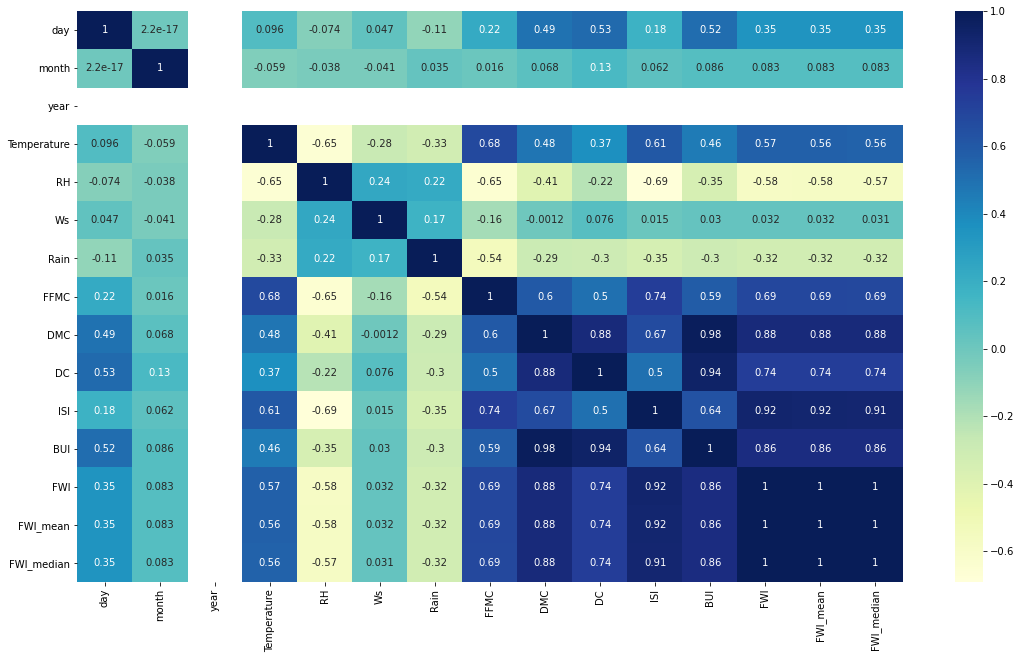

In [98]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.heatmap(df_1.corr(),cmap="YlGnBu", annot=True)

### Random Sample Imputer

In [169]:
df_rand = df.copy()

In [100]:
df_rand.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
dtype: int64

In [127]:
df_rand['FWI'].dropna().sample(df_rand['FWI'].isnull().sum()).values
# choses  number of random numbers equals to the number of missing values

array([0.9])

In [126]:
df_rand[df_rand['FWI'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN,NaN


In [131]:
df_rand['FWI'][df_rand['FWI'].isnull()] = df_rand['FWI'].dropna().sample(df_rand['FWI'].isnull().sum()).values

<ipython-input-131-43be2bd7c941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rand['FWI'][df_rand['FWI'].isnull()] = df_rand['FWI'].dropna().sample(df_rand['FWI'].isnull().sum()).values


In [133]:
df_rand.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [134]:
df_rand['FWI'][167]

0.4

<Figure size 720x720 with 0 Axes>

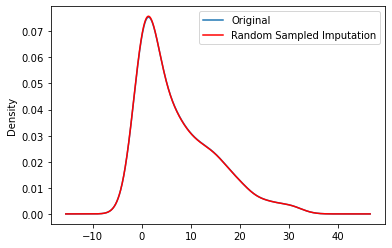

In [135]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
df['FWI'].plot(kind='kde', ax= ax)
df_rand['FWI'].plot(kind='kde', ax= ax,color='red')
ax.legend(labels=['Original','Random Sampled Imputation'])

plt.show()

In [136]:
print('Original_variance: ',df['FWI'].var())
print('RandSampImp_variance: ',df_rand['FWI'].var())

Original_variance:  55.36204809033089
RandSampImp_variance:  55.314665047561235


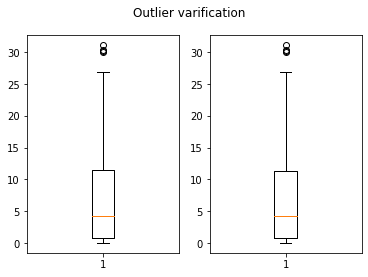

In [161]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Outlier varification')
ax1.boxplot(df['FWI'].dropna())
ax2.boxplot(df_rand['FWI'])
plt.show()

In [170]:
df_rand['Classes'][df_rand['Classes'].isnull()] = df_rand['Classes'].dropna().sample(df_rand['Classes'].isnull().sum()).values

<ipython-input-170-28af7c9a89a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rand['Classes'][df_rand['Classes'].isnull()] = df_rand['Classes'].dropna().sample(df_rand['Classes'].isnull().sum()).values


In [171]:
df_rand['Classes'][167]

'not fire'

## KNN impytation

In [172]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [179]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
k_range = range(1, 11)
para = {'n_neighbors':k_range}

In [186]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(imputer,para,cv=5, scoring='accuracy')

In [190]:
grid.fit(df.iloc[:,:-1])

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Praveen\anaconda3\lib

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 672, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\Praveen\anaconda3\lib

GridSearchCV(cv=5, estimator=KNNImputer(),
             param_grid={'n_neighbors': range(1, 11)}, scoring='accuracy')

In [214]:
imputer = KNNImputer(n_neighbors=5)
arr = (imputer.fit_transform(df.iloc[:,:-1]))

In [245]:
df_imp = pd.DataFrame(arr, columns = df.columns[:-1])
imputed_value = df_imp[(df_imp["day"] ==14) & (df_imp['RH']==37)]['FWI'].values

In [246]:
df[(df["day"] ==14) & (df['RH']==37)]['FWI'].values

array([nan])

In [248]:
print(f'missing value in df is replaced with {int(imputed_value)} using the knn imputation')

missing value in df is replaced with 8 using the knn imputation


to fill the categorical missing values first its needed to be encoded and then do KNN imputation

## EDA

In [269]:
data = df_1.copy()

In [270]:
data.to_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [271]:
data.shape

(244, 17)

In [272]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Classes_mode', 'FWI_mean',
       'FWI_median'],
      dtype='object')

In [273]:
data.drop(['FWI' , 'FWI_median' , 'Classes', 'year'], axis = 1, inplace=True)

In [274]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes_mode,FWI_mean
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,not fire,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,not fire,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,not fire,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,not fire,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,not fire,0.5


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   day           244 non-null    int64  
 1   month         244 non-null    int64  
 2   year          244 non-null    int64  
 3   Temperature   244 non-null    int64  
 4   RH            244 non-null    int64  
 5   Ws            244 non-null    int64  
 6   Rain          244 non-null    float64
 7   FFMC          244 non-null    float64
 8   DMC           244 non-null    float64
 9   DC            244 non-null    float64
 10  ISI           244 non-null    float64
 11  BUI           244 non-null    float64
 12  Classes_mode  244 non-null    object 
 13  FWI_mean      244 non-null    float64
dtypes: float64(7), int64(6), object(1)
memory usage: 36.7+ KB


In [262]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI_mean
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.425242
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


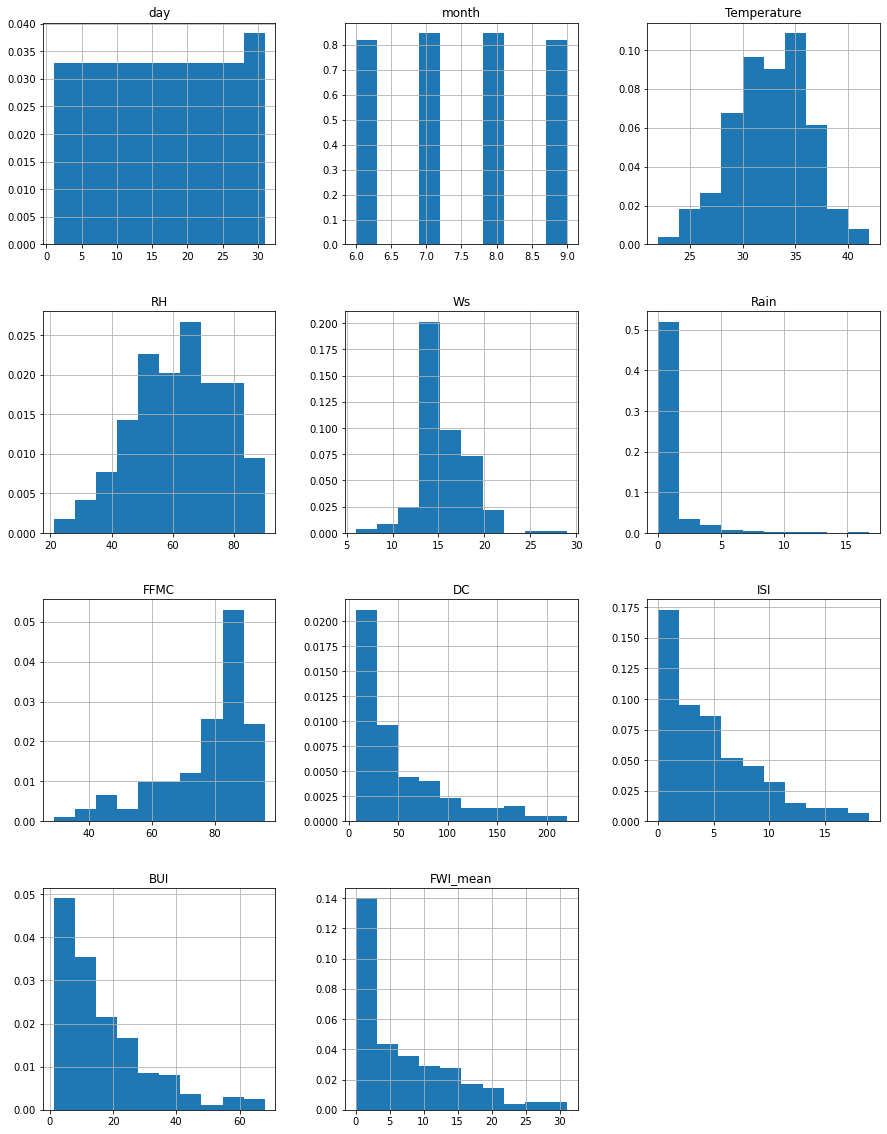

In [326]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax, density=True )
#data.hist()
plt.show()

<AxesSubplot:>

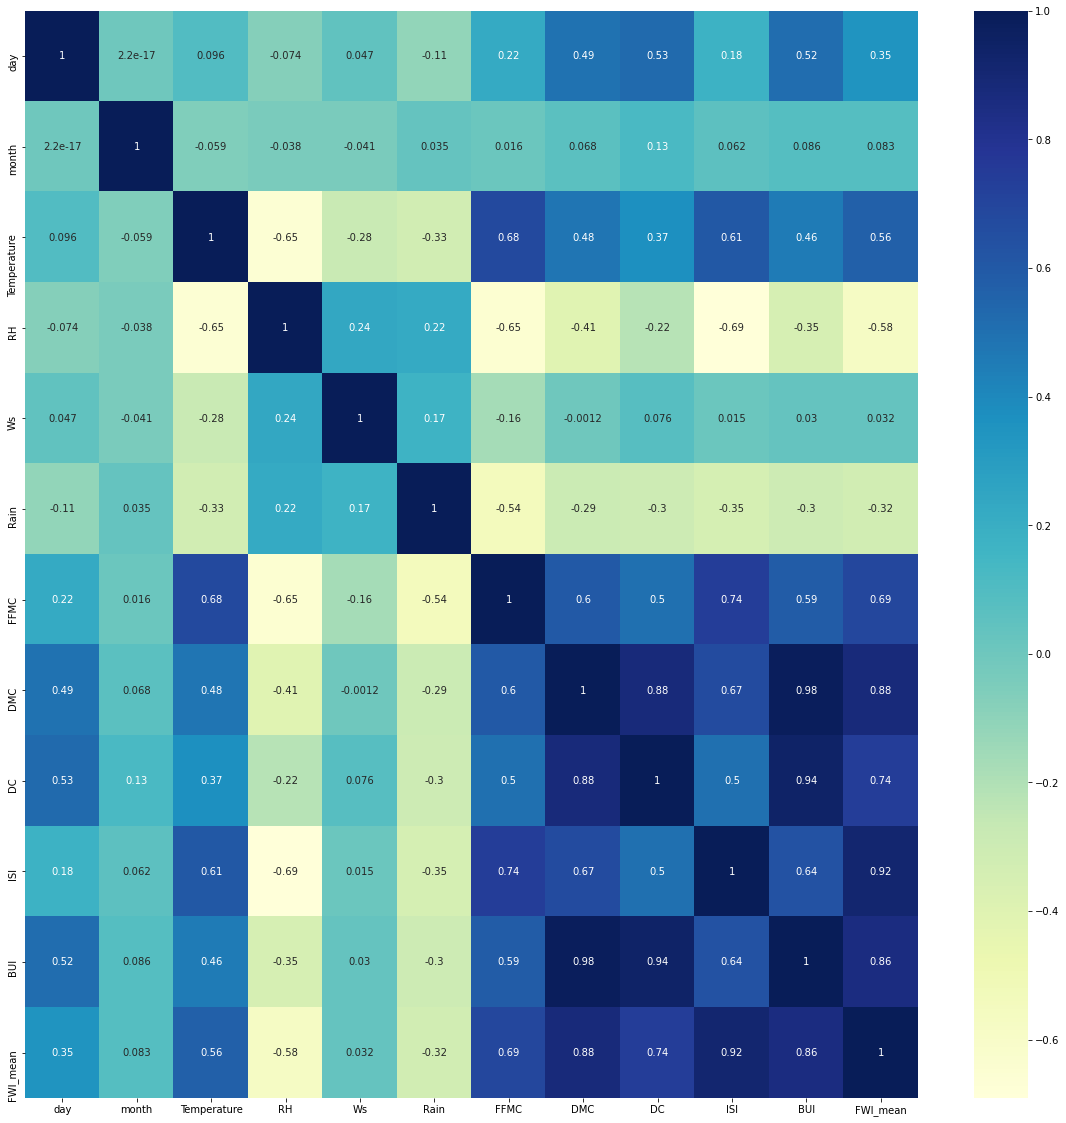

In [285]:
# dendependent variable classes and Fire Weather Index
# correleation

#sns.heatmap(data.corr())
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

In [295]:
# correlation between BUI and DMC is 98%, and BUI, DC is 94%
# We can drop BUI or DMC
data.drop('DMC', axis=1, inplace= True)

# aome of the features are negatively correlated can be removed to increase the rfficiency of the model

KeyError: "['DMC'] not found in axis"

In [287]:
data.shape

(244, 12)

### Chaking for balanced dataset for classification problem

In [291]:
data.groupby('Classes_mode')['Classes_mode'].count()

Classes_mode
fire        138
not fire    106
Name: Classes_mode, dtype: int64

In [294]:
data.Classes_mode.value_counts() # dataset is fairly balanced

fire        138
not fire    106
Name: Classes_mode, dtype: int64

<AxesSubplot:xlabel='Classes_mode', ylabel='count'>

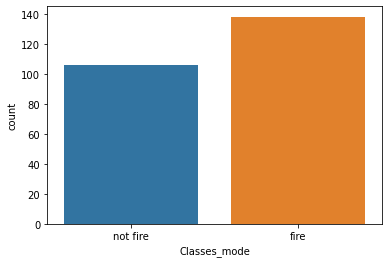

In [292]:
sns.countplot(x ='Classes_mode', data = data)

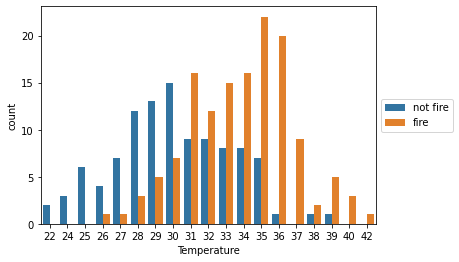

In [302]:
sns.countplot(x ='Temperature', data = data, hue='Classes_mode')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

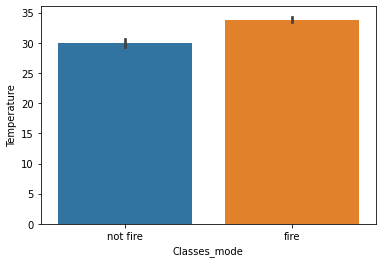

In [318]:
ax = sns.barplot(y ='Temperature', x= 'Classes_mode' ,data = data )
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Checking for outliers

<AxesSubplot:>

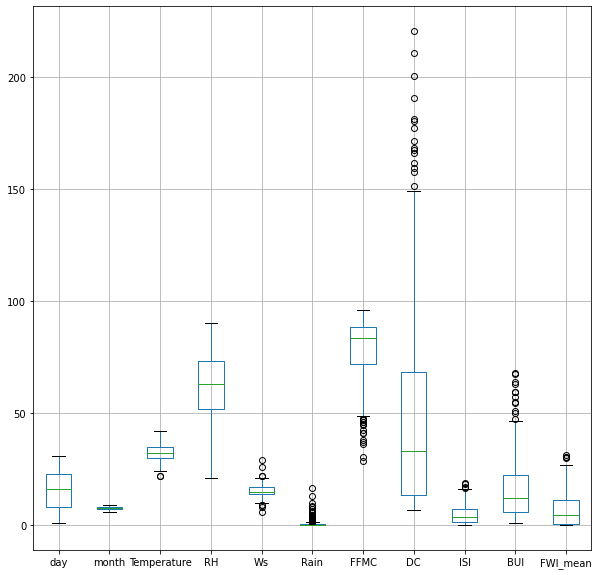

In [321]:
plt.figure(figsize=(10,10))
data.boxplot()

#### Feature transformation

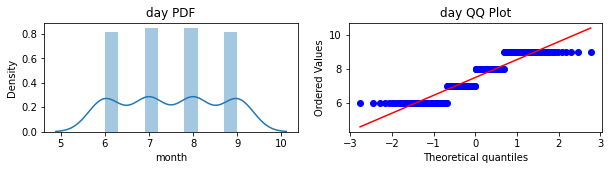

In [325]:
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(data['month'])
plt.title('day PDF')
plt.subplot(122)
stats.probplot(data['month'], dist="norm", plot=plt)
plt.title('day QQ Plot')
plt.show()

In [330]:
list(data.columns).remove('Classes_mode')

In [349]:
a = list(data.columns)
a

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DC',
 'ISI',
 'BUI',
 'Classes_mode',
 'FWI_mean']

In [350]:
a.remove('Classes_mode')
a.remove('Rain')

In [352]:
a.remove('ISI')

In [354]:
a.remove('FWI_mean')

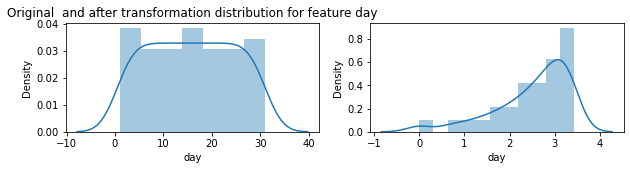

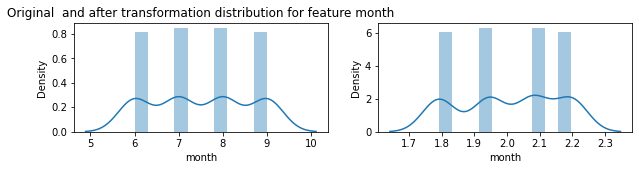

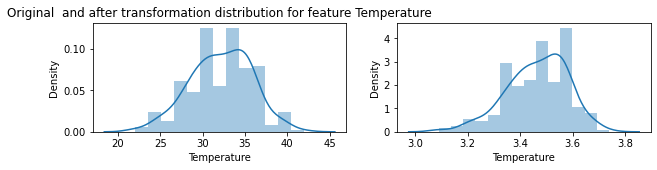

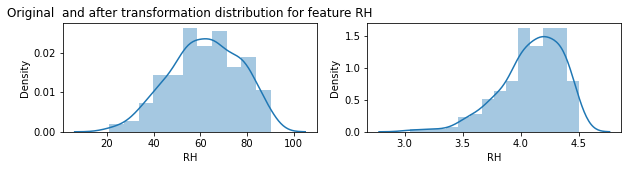

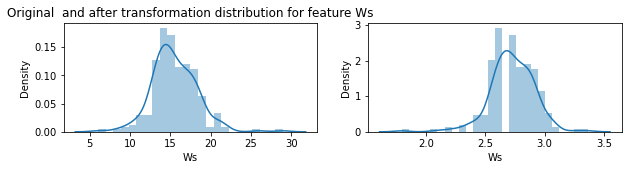

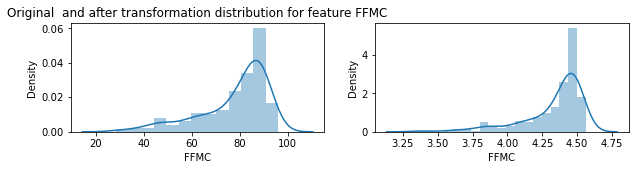

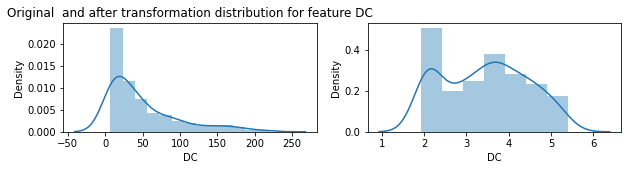

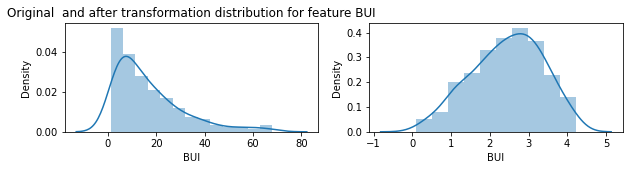

In [355]:
for idx,i in enumerate(a):
    plt.figure(figsize=(10,2))
    plt.subplot(121)
    sns.distplot(data[i])
    plt.title(f'Original  and after transformation distribution for feature {a[idx]}')
    plt.subplot(122)
    sns.distplot(np.log(data[i]))

In [364]:
x = data.drop('Classes_mode', axis=1)

In [367]:
(x.values < 0).any()

False

In [387]:
b = list(data.columns)
b.remove('Classes_mode')

In [389]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit_transform(x)
x_mod = list(pt.fit_transform(x))
x_trans = pd.DataFrame(x_mod, columns=b)

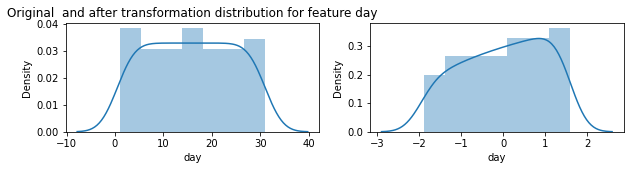

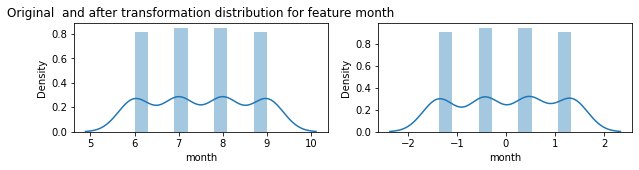

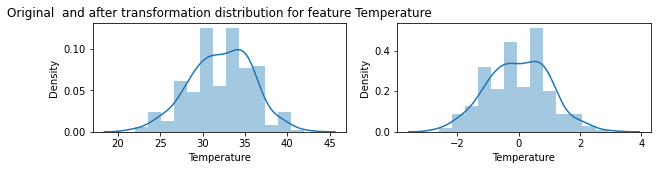

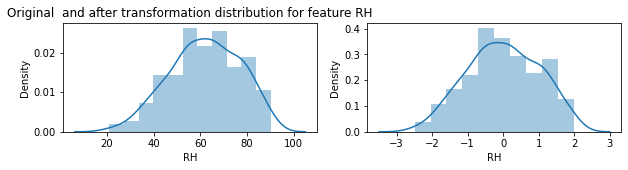

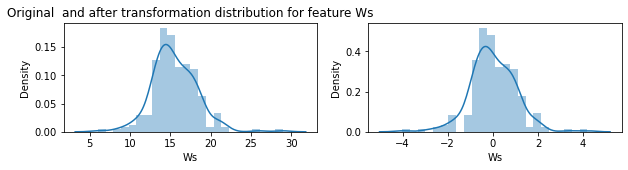

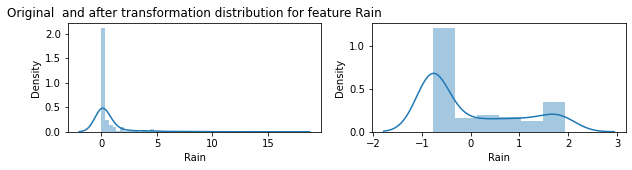

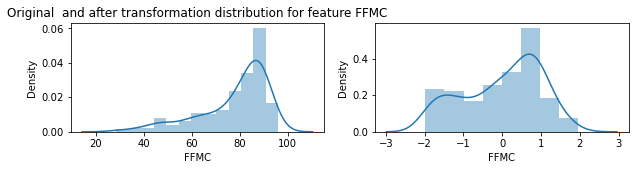

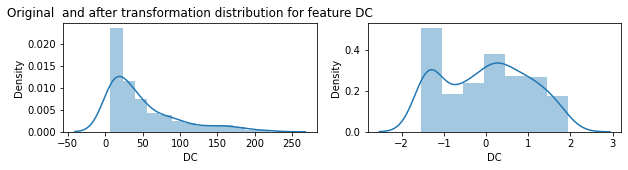

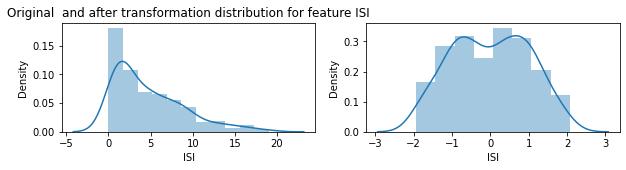

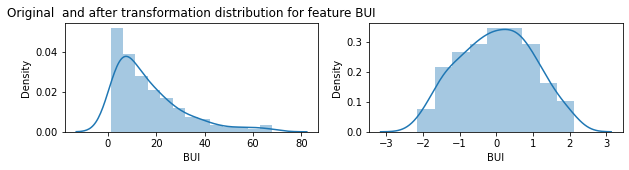

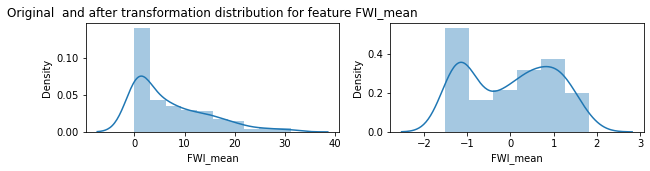

In [390]:
for idx,i in enumerate(x_trans):
    plt.figure(figsize=(10,2))
    plt.subplot(121)
    sns.distplot(data[i])
    plt.title(f'Original  and after transformation distribution for feature {b[idx]}')
    plt.subplot(122)
    sns.distplot((x_trans[i]))

## Remove outliers

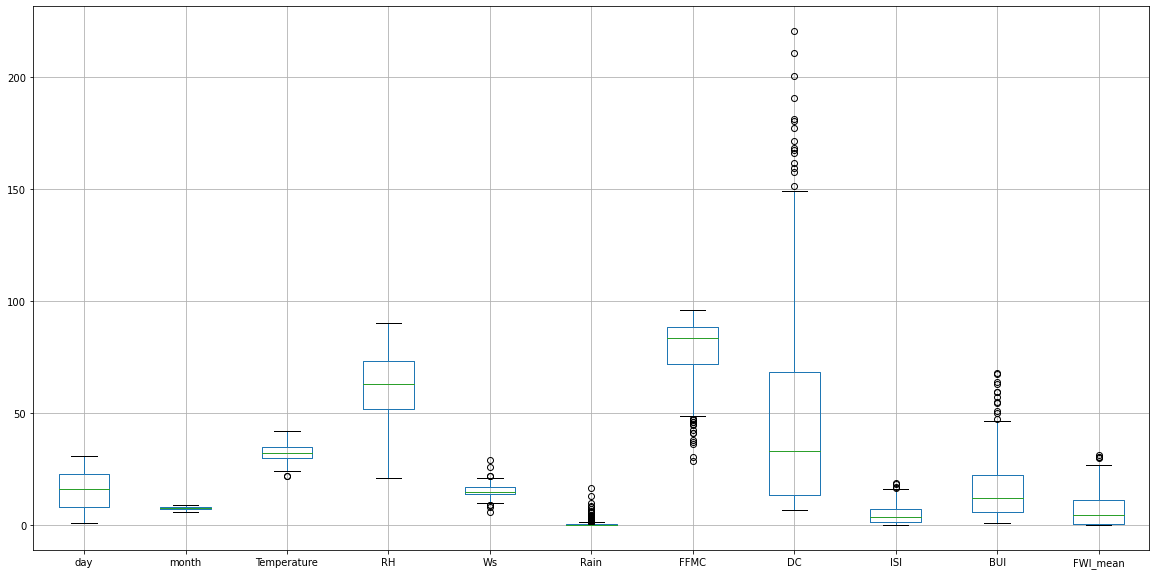

In [395]:
plt.figure(figsize=(20,10))
data.boxplot()
plt.show()

In [397]:
data.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI_mean
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,49.288484,4.774180,16.664754,7.035391
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,47.619393,4.175318,14.204824,7.425242
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,33.100000,3.500000,12.250000,4.450000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,220.400000,19.000000,68.000000,31.100000


In [410]:
percentile_25per = data['FWI_mean'].quantile(0.25)
percentile_75per = data['FWI_mean'].quantile(0.75)
IQR = percentile_75per-percentile_25per
IQR

10.675

In [411]:
lower_threshold = percentile_25per - (1.5 * IQR)
upper_threshold = percentile_75per + (1.5 * IQR)
print(f'Lower threshold value: {lower_threshold} \nUpper threshold value: {upper_threshold}')

Lower threshold value: -15.312500000000004 
Upper threshold value: 27.387500000000003


In [431]:
upper_outlier_indices = (data[data['FWI_mean'] > upper_threshold]).index

In [436]:
lower_outlier_indices = data[data['FWI_mean'] < lower_threshold].index
lower_outlier_indices

Int64Index([], dtype='int64')

In [439]:
data.drop(upper_outlier_indices, inplace=True)

In [424]:
#np.where(data['FWI_mean'] < lower_threshold, lower_threshold,data['FWI_mean'])

array([ 0.5       ,  0.4       ,  0.1       ,  0.        ,  0.5       ,
        2.5       ,  7.2       ,  7.1       ,  0.3       ,  0.9       ,
        5.6       ,  7.1       ,  0.2       ,  0.4       ,  0.1       ,
        0.        ,  0.        ,  0.2       ,  1.4       ,  0.4       ,
        2.2       ,  2.3       ,  3.8       ,  7.5       ,  8.4       ,
       10.6       , 15.        , 13.9       ,  3.9       , 12.9       ,
        0.4       ,  0.3       ,  0.5       ,  1.7       ,  4.9       ,
        6.8       ,  3.2       ,  8.        ,  0.6       ,  0.5       ,
        2.2       ,  0.9       ,  3.4       ,  0.8       ,  0.5       ,
        0.4       ,  3.6       ,  6.        , 10.9       ,  4.        ,
        8.8       ,  2.8       ,  2.1       ,  1.3       ,  7.3       ,
       15.3       , 15.3       , 11.3       , 11.9       , 10.7       ,
       15.7       ,  0.9       ,  0.8       ,  0.8       ,  3.9       ,
        6.1       ,  6.8       ,  8.        ,  2.6       ,  9.9 

In [428]:
#len(np.where(data['FWI_mean'] > upper_threshold, upper_threshold,np.where(data['FWI_mean'] < lower_threshold, lower_threshold,data['FWI_mean'])))

244

In [442]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,Classes_mode,FWI_mean
0,1,6,29,57,18,0.0,65.7,7.6,1.3,3.4,not fire,0.5
1,2,6,29,61,13,1.3,64.4,7.6,1.0,3.9,not fire,0.4
2,3,6,26,82,22,13.1,47.1,7.1,0.3,2.7,not fire,0.1
3,4,6,25,89,13,2.5,28.6,6.9,0.0,1.7,not fire,0.0
4,5,6,27,77,16,0.0,64.8,14.2,1.2,3.9,not fire,0.5


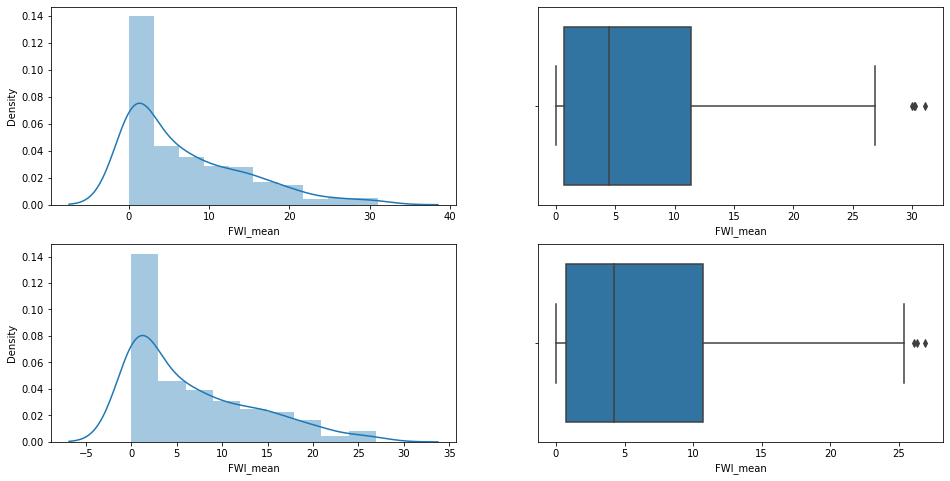

In [444]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df_1['FWI_mean'])

plt.subplot(2,2,2)
sns.boxplot(df_1['FWI_mean'])

plt.subplot(2,2,3)
sns.distplot(data['FWI_mean'])

plt.subplot(2,2,4)
sns.boxplot(data['FWI_mean'])

plt.show()

In [449]:
data_x =data.drop('Classes_mode', axis = 1)

In [451]:
from scipy.stats import zscore
z_scores = zscore(data_x)
abs_zscore = np.abs(z_scores)
#print(z_scores)
filtered_entries = (abs_zscore < 3).all(axis=1)
new_df = data[filtered_entries]

In [452]:
new_df.shape

(224, 12)

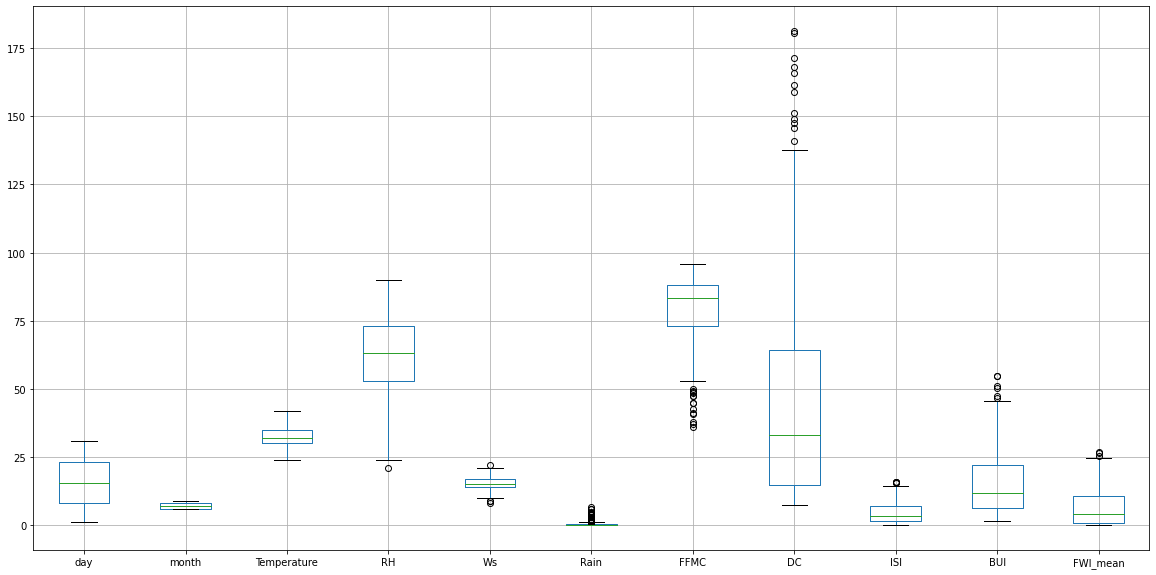

In [454]:
plt.figure(figsize=(20,10))
new_df.boxplot()
plt.show()

In [459]:
new_df.to_csv('Algerian Forest Fire_final.csv', index=False)

In [474]:
cat_feat = ['Classes_mode']
num_feat = list(data.columns)

In [475]:
cat_feat

['Classes_mode']

In [476]:
num_feat.remove('Classes_mode')
num_feat

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DC',
 'ISI',
 'BUI',
 'FWI_mean']

In [479]:
new = ['day','month','Temperature','RH']

In [481]:
# finding outliers indices

def outliers(df,feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 -q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    outlier_indies = df.index[(df[feature] > upper_bound) | (df[feature] < lower_bound)]
    return outlier_indies

In [483]:
indices = []

for feature in num_feat:
    indices.extend(outliers(data, feature))

In [488]:
len(set(indices))

66

In [489]:
def remove_outliers(df, ls):
    ls = sorted(set(ls))
    df=df.drop(ls)
    return df

In [491]:
df_cleaned = remove_outliers(data,indices)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee0a4a8dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee0b0cf0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee0a4a8ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee03960700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee0a9927f0>],
 'means': []}

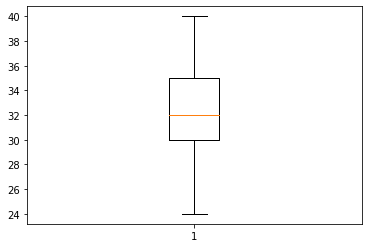

In [496]:
plt.boxplot(df_cleaned['Temperature'])